In [1]:
from polytune import create_job, Experiment, SearchSpace, Real
from math import sin

In [2]:
space = SearchSpace()
space.add_parameter(Real('x', low=0.0, high=2.0))
space.add_parameter(Real('y', low=0.0, high=2.0))

In [3]:
def objective(experiment: Experiment):
    params = experiment.params

    x = params.get('x', 5.0)
    y = params.get('y', 5.0)

    return sin(x*y)

In [4]:
job = create_job(space)

In [5]:
job.do(objective, n_trials=500, n_proc=5, algo_list=['grid'])

/Users/qnbhd/Development/polytune/polytune/search/algorithms/grid_search.py:40: UserWarning: Per emit count not implemented.
  warnings.warn('Per emit count not implemented.')
/Users/qnbhd/Development/polytune/polytune/jobs/job.py:159: UserWarning: No new configurations.
  warnings.warn('No new configurations.')


In [6]:
job.best_parameters

{'x': 2.0, 'y': 2.0}

/Users/qnbhd/Library/Caches/pypoetry/virtualenvs/polytune-Lx3hVSSz-py3.9/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'y')

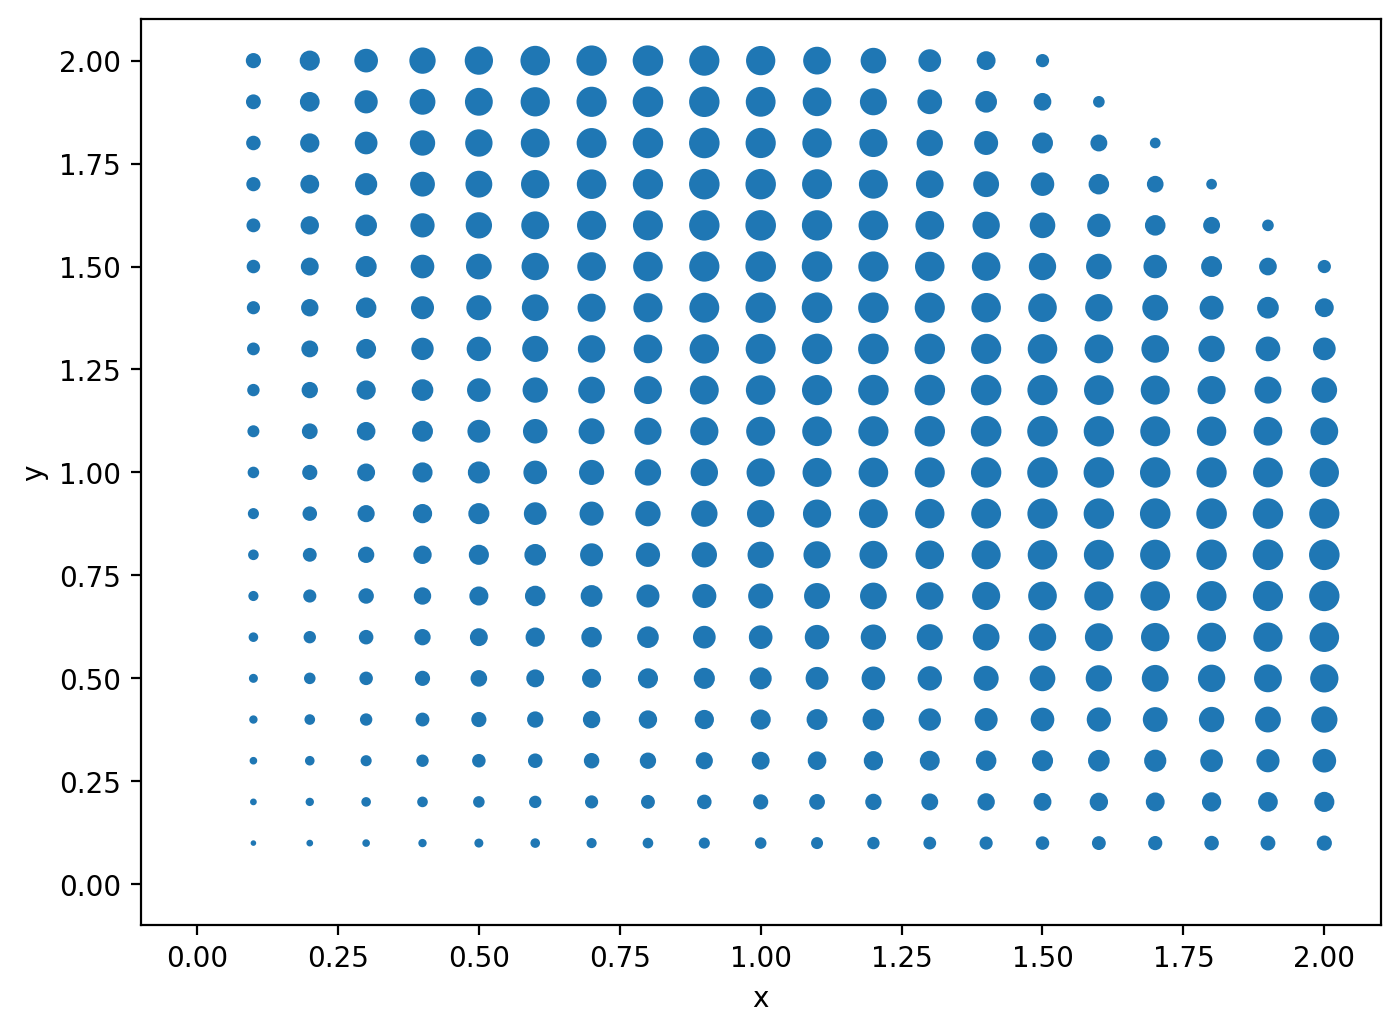

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=200)

df = job.dataframe

df['objective_result'] = df['objective_result'].multiply(100)

plt.scatter(df['x'], df['y'], df['objective_result'])
plt.xlabel('x')
plt.ylabel('y')